In [110]:
%matplotlib inline

In [108]:
import matplotlib.pyplot as plt
import sympy as sym

In [85]:
class S(sym.Function):
    """Matching function"""
    
    is_real = True
    
    @classmethod
    def eval(cls, x):
        """We require the S(0)=0 and S(1)=1"""
        if x.is_Number and x is sym.S.Zero:
            return sym.S.Zero
        elif x.is_Number and x is sym.S.One:
            return sym.S.One


In [98]:
def total_surviving_altruists(x, S, PiaA, PiAA, Piaa, PiAa):
    num_survivors = (2 * PiAA * x * S(x)**2 +
                     Piaa * x * (1 - S(x))**2 + 
                     (2 * PiAa + PiaA) * x * S(x) * (1 - S(x)) +
                     PiAA * (1 - x) * S(x)**2 + 
                     PiAa * (1 - x) * S(x) * (1 - S(x)))
    return num_survivors


def total_altruists(x, S, PiaA, PiAA, Piaa, PiAa):
    num_total = (2 * PiAA * x * S(x)**2 +
                 2 * Piaa * (1 - x) * (1 - S(x))**2 + 
                 2 * (PiAa + PiaA) * x * S(x) * (1 - S(x)))
    return num_total


In [99]:
def share_altruists(t, x, S, PiaA, PiAA, Piaa, PiAa):
    x_dot = ((total_surviving_altruists(x, S, PiaA, PiAA, Piaa, PiAa) /
              total_altruists(x, S, PiaA, PiAA, Piaa, PiAa)) - x)
    return x_dot

In [100]:
t, x = sym.symbols('t, x')
PiaA, PiAA, Piaa, PiAa = sym.symbols('PiaA, PiAA, Piaa, PiAa')

share_altruists(t, x, S, PiaA, PiAA, Piaa, PiAa)

-x + (2*PiAA*x*S(x)**2 + PiAA*(-x + 1)*S(x)**2 + PiAa*(-x + 1)*(-S(x) + 1)*S(x) + Piaa*x*(-S(x) + 1)**2 + x*(2*PiAa + PiaA)*(-S(x) + 1)*S(x))/(2*PiAA*x*S(x)**2 + 2*Piaa*(-x + 1)*(-S(x) + 1)**2 + x*(2*PiAa + 2*PiaA)*(-S(x) + 1)*S(x))

In [101]:
# unless I screwed up, x=0, 1 should both be fixed points!
assert share_altruists(0, 0, S, PiaA, PiAA, Piaa, PiAa) == 0
assert share_altruists(0, 1, S, PiaA, PiAA, Piaa, PiAa) == 0

In [102]:
rhs_jac = share_altruists(t, x, S, PiaA, PiAA, Piaa, PiAa).diff(x, 1)

In [103]:
rhs_jac.subs({x:0}).simplify()

(PiAa*Subs(Derivative(S(x), x), (x,), (0,)) - Piaa)/(2*Piaa)

Stability condition for equilibrium at $x=0$...

\begin{align}
    %\frac{\Pi_{Aa}S'(0) + \Pi_{aa}}{2\Pi_{aa}} - 1 < 0 \\
    %\frac{\Pi_{Aa}S'(0) + \Pi_{aa}}{2\Pi_{aa}} < 1 \\
    %\Pi_{Aa}S'(0) + \Pi_{aa} < 2\Pi_{aa} \\
    %\Pi_{Aa}S'(0) < \Pi_{aa} \\
    1 < S'(0) < \frac{\Pi_{aa}}{\Pi_{Aa}} \\
\end{align}

In [104]:
rhs_jac.subs({x:1}).simplify()

-3/2 + PiaA*Subs(Derivative(S(x), x), (x,), (1,))/(2*PiAA)

Stability condition for equilibrium at $x=1$...

\begin{align}
    %-\frac{3}{2} + \frac{\Pi_{aA}S'(1)}{2\Pi_{AA}} < 0 \\
    %\frac{\Pi_{aA}S'(1)}{2\Pi_{AA}} < \frac{3}{2} \\
    S'(1) < \frac{3\Pi_{AA}}{\Pi_{aA}} \\
\end{align}

### Example: Wright Bergstrom matching

In [105]:
def wright_bergstrom_matching(x, e=0.5):
    return x**(1 - e)

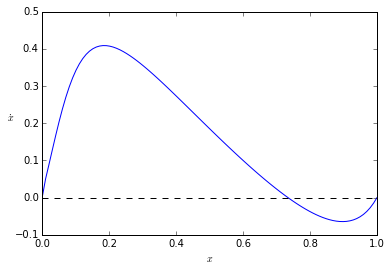

In [119]:
ts = np.linspace(0, 100, 100)
xs = np.linspace(0, 1, 100)
params = {'PiaA': 50, 'PiAA': 4, 'Piaa': 3, 'PiAa': 2}

plt.plot(xs, share_altruists(ts, xs, wright_bergstrom_matching, **params))
plt.axhline(y=0, linestyle='dashed', color='k')
plt.ylabel(r'$\dot{x}$', rotation='horizontal')
plt.xlabel(r'$x$')
plt.show()